In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [17]:
url="https://raw.githubusercontent.com/mrunmayee098/Diabetes-Detection/main/diabetes_prediction_dataset.csv"

In [18]:
df1=pd.read_csv(url)

In [19]:
df1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [20]:
 # df1.set_index("bmi", inplace=True)

In [21]:
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [22]:
# df1.reset_index(drop=True).head()

In [23]:
df1.isnull().head(6)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False


In [24]:
missing_values=df1.isnull().head(4)
print(missing_values)

   gender    age  hypertension  heart_disease  smoking_history    bmi  \
0   False  False         False          False            False  False   
1   False  False         False          False            False  False   
2   False  False         False          False            False  False   
3   False  False         False          False            False  False   

   HbA1c_level  blood_glucose_level  diabetes  
0        False                False     False  
1        False                False     False  
2        False                False     False  
3        False                False     False  


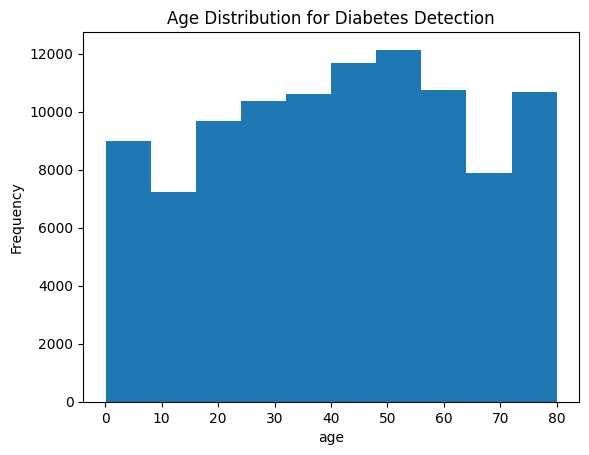

In [25]:
plt.hist(df1.age)
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("Age Distribution for Diabetes Detection")
plt.show()

In [26]:
print(df1.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


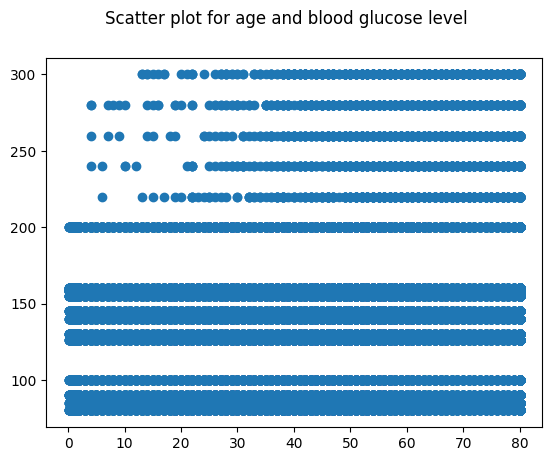

In [27]:
plt.scatter(df1.age, df1.blood_glucose_level)
plt.suptitle("Scatter plot for age and blood glucose level")
plt.show()

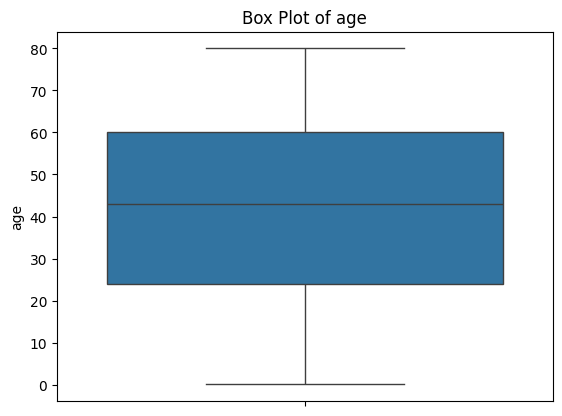

In [28]:
sns.boxplot(y=df1.age)
plt.title(f"Box Plot of age")
plt.show()

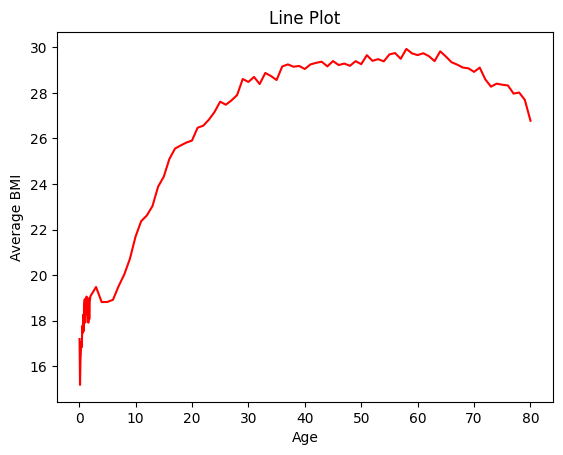

In [36]:
plt.title("Line Plot")

# Group by age and take the mean of BMI
df_grouped = df1.groupby("age")["bmi"].mean().reset_index()

plt.plot(df_grouped["age"], df_grouped["bmi"], label="Average BMI", color="red")

plt.xlabel("Age")
plt.ylabel("Average BMI")
plt.show()


C:\Users\b\AppData\Local\Temp\ipykernel_1044\203424429.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df1['blood_glucose_level'])


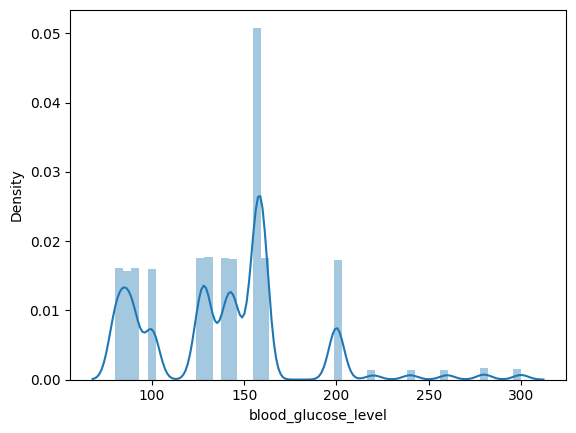

In [23]:
sns.distplot(a=df1['blood_glucose_level'])
plt.show()

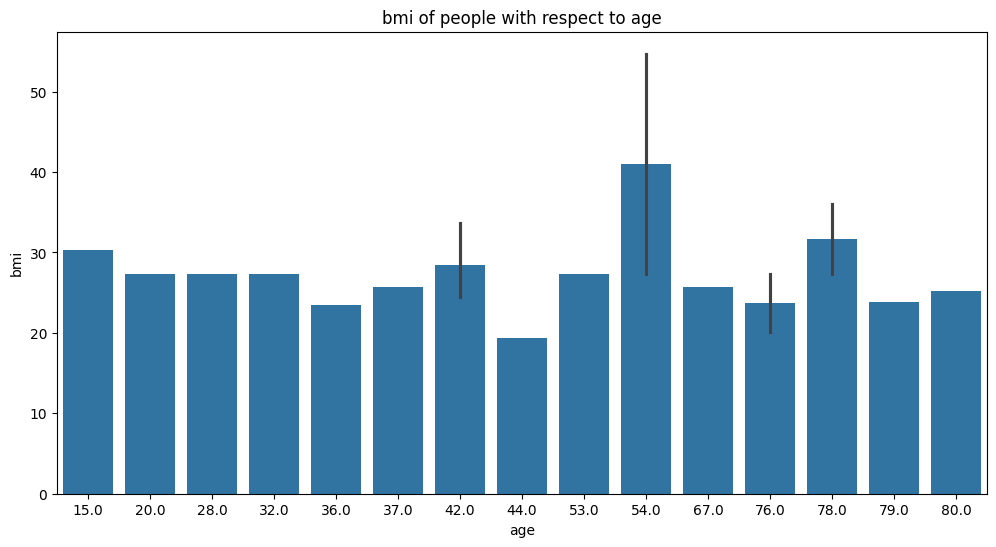

In [24]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar plot (for first 20 students)
sns.barplot(x=df1["age"][:20], y=df1["bmi"][:20])

# Labels and title
plt.xlabel("age")
plt.ylabel("bmi")
plt.title("bmi of people with respect to age")

# Show the plot
plt.show()

In [40]:
#Create a contigency table 
contigency_table = pd.crosstab(df1["heart_disease"], df1["gender"])

#Display the table
print(contigency_table)

gender         Female   Male  Other
heart_disease                      
0               56990  39050     18
1                1562   2380      0


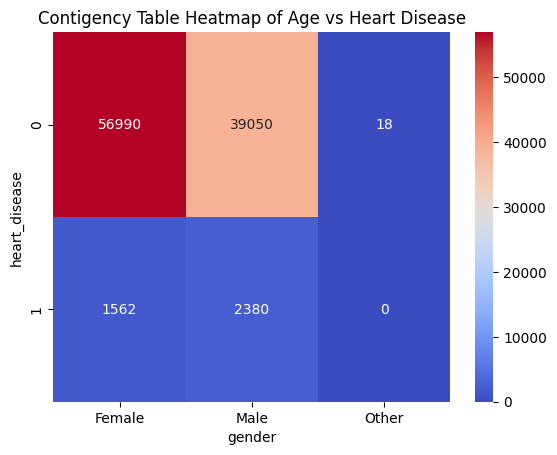

In [44]:
sns.heatmap(contigency_table, annot = True, cmap = "coolwarm", fmt = "d") 
plt.title("Contigency Table Heatmap of Age vs Heart Disease") 
plt.show()

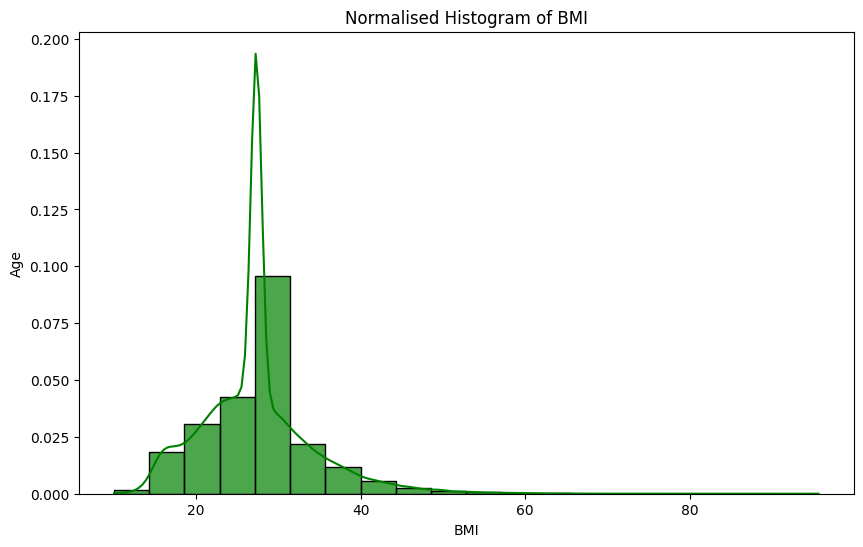

In [46]:
#set figure size
plt.figure(figsize = (10, 6))

#Create a normalised histogram for bmi
sns.histplot(df1["bmi"], bins = 20, kde = True, stat = "density", color = "green", alpha = 0.7)

#Labels and title
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Normalised Histogram of BMI")

# Show the plot 
plt.show()

In [27]:
field = "bmi"

#Compute Q1(25th percentile) and Q3(75th percentile)
Q1=df1[field].quantile(0.25)
Q3=df1[field].quantile(0.75)
IQR=Q3-Q1
print(IQR)

#Define outlier thresholds
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

#Get all outlier records
outliers = df1[(df1[field] < lower_bound) | (df1[field] > upper_bound)]

5.949999999999999


In [28]:
print(f"lower bound: {lower_bound}")
print(f"upper bound: {upper_bound}")

lower bound: 14.705
upper bound: 38.504999999999995


In [29]:
print(df1[['blood_glucose_level', 'age']].describe())

       blood_glucose_level            age
count        100000.000000  100000.000000
mean            138.058060      41.885856
std              40.708136      22.516840
min              80.000000       0.080000
25%             100.000000      24.000000
50%             140.000000      43.000000
75%             159.000000      60.000000
max             300.000000      80.000000


In [30]:
print("Outliers")
print(outliers[['blood_glucose_level', field]])

Outliers
       blood_glucose_level    bmi
11                     100  54.70
24                     140  13.99
39                     200  56.43
59                     155  63.48
93                     130  55.61
...                    ...    ...
99933                  155  13.34
99948                  126  39.62
99953                  158  60.52
99960                  126  45.15
99993                  155  40.69

[7086 rows x 2 columns]


In [31]:
# Get the top 10 largest values in the chosen field
top_10_values = df1.nlargest(10, field)
print(top_10_values)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
87843    Male   7.0             0              0         No Info  95.69   
76093    Male  16.0             0              0         No Info  95.22   
69549    Male  38.0             0              0           never  91.82   
96066    Male  80.0             0              0           never  88.76   
4551   Female  45.0             0              0           never  88.72   
90043  Female  34.0             0              0         No Info  87.70   
22454    Male  19.0             0              0         No Info  87.51   
24186    Male  49.0             0              0          former  83.74   
71485  Female  48.0             0              0           never  81.73   
20591  Female  39.0             0              0         No Info  79.48   

       HbA1c_level  blood_glucose_level  diabetes  
87843          6.1                  130         0  
76093          4.5                   90         0  
69549          6.0

In [32]:
field = "bmi"

# Standardization
df1[f'{field}_standardized'] = (df1[field] - df1[field].mean()) / df1[field].std()

# Print first few rows
print(df1[[field, f'{field}_standardized']].head())

     bmi  bmi_standardized
0  25.19         -0.321054
1  27.32         -0.000116
2  27.32         -0.000116
3  23.45         -0.583229
4  20.14         -1.081965


In [33]:
# Find outliers (values beyond ±3 standard deviations)
outliers_std = df1[abs(df1[f'{field}_standardized']) > 3]

# Print total number of outliers
print(f"Number of outliers: {len(outliers_std)}")

Number of outliers: 1294


In [34]:
# Find the most extreme outlier (highest absolute deviation)
most_extreme_outlier = outliers_std.loc[outliers_std[f'{field}_standardized'].abs().idxmax()]

# Print most extreme outlier
print("Most Extreme Outlier:")
print(most_extreme_outlier[[field, f'{field}_standardized']])

Most Extreme Outlier:
bmi                     95.69
bmi_standardized    10.301562
Name: 87843, dtype: object


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   bmi_standardized     100000 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 7.6+ MB


In [36]:
df1.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
bmi_standardized       float64
dtype: object

In [37]:
data_crosstab = pd.crosstab(df1['bmi'],
                            df1['age'], 
                            margins = False)
print(data_crosstab)

age    0.08   0.16   0.24   0.32   0.40   0.48   0.56   0.64   0.72   0.80   \
bmi                                                                           
10.01      0      0      0      0      0      0      0      0      0      0   
10.08      0      0      0      0      0      0      0      0      0      0   
10.14      0      0      0      0      0      0      0      0      0      0   
10.19      0      0      0      0      0      0      0      0      0      0   
10.21      0      0      0      0      0      1      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
88.72      0      0      0      0      0      0      0      0      0      0   
88.76      0      0      0      0      0      0      0      0      0      0   
91.82      0      0      0      0      0      0      0      0      0      0   
95.22      0      0      0      0      0      0      0      0      0      0   
95.69      0      0      0      0      0      0     

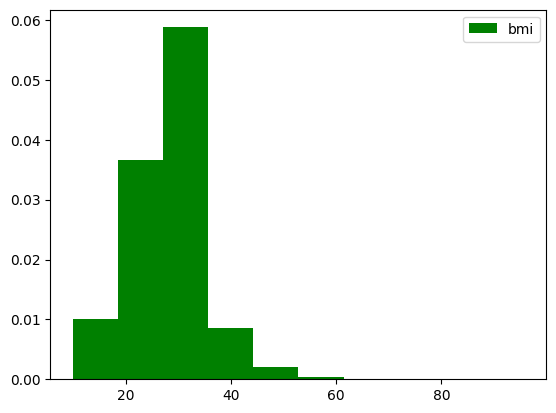

In [38]:
plt.hist(df1['bmi'],
         density = True,
         color = 'green',
         label = "bmi")
plt.legend()
plt.show()